**Implementation Of ANN In Python From Scratch**

In [ ]:
#Mounting my google drive as I am coding in google colaboratory.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
#Implementing basic libraries
import pandas as pd
import numpy as np

In [47]:
#Loading the dataset(in csv form)
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance2.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


*****Short Review Of The Data*****

***Features:***
Age,sex,BMI(Body Mass Index),Children,Smoker,Region,Charges

***Target:***
Insurance Claim

***Objective:***
To buid a custom ANN model which could predict whether a person will claim his/her insurance or not based on the available features.

In [48]:
#Separating the features and target column
X=df.drop('insuranceclaim',axis=1)
y=df['insuranceclaim']

In [49]:
X.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [50]:
y.head(5)

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

# MinMax Scaling
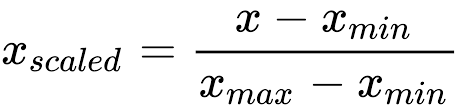

In [51]:
#Since the data in the feature are not scaled so first we attempt towards scaling them.
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [52]:
X_scaled

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.333333,0.151299
1334,0.000000,0.0,0.429379,0.0,0.0,0.000000,0.017305
1335,0.000000,0.0,0.562012,0.0,0.0,0.666667,0.008108
1336,0.065217,0.0,0.264730,0.0,0.0,1.000000,0.014144


In [82]:
#Training_testing and Splitting the data
def train_test_split(data, split):


  train_size=int(split*len(df))
 
  indices = list(range(len(df)))
  np.random.shuffle(indices)

  train_indices = indices[:train_size]
  test_indices = indices[train_size:]

  # split the actual data
  X_train, X_test = X_scaled.iloc[train_indices], X_scaled.iloc[test_indices]
  y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

  return X_train,X_test,y_train,y_test


In [83]:
#Calling the function for splitting the training and testing data.
X_train,X_test,y_train,y_test=train_test_split(data=df,split=0.80)

#Log-Loss Function
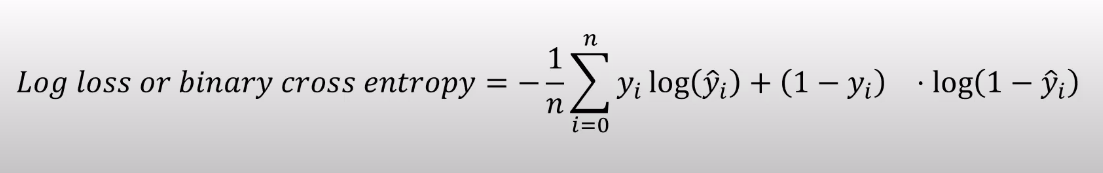

In [84]:
#log loss function
def log_loss(y_actual, y_predicted):
    small_num = 1e-15  #very small number for preventing the mathematical error while taking log.
    y_predicted_new = [max(i,small_num) for i in y_predicted]
    y_predicted_new = [min(i,1-small_num) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_actual*np.log(y_predicted_new)+(1-y_actual)*np.log(1-y_predicted_new))


#Sigmoid Function
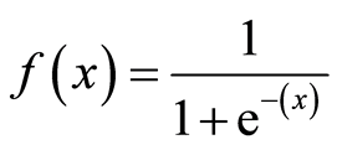

In [56]:
def sigmoid(value):
   return 1/(1+np.exp(-value))

In [85]:
class customANN:

  def __init__(self):
    self.w1=1
    self.w2=1
    self.w3=1
    self.w4=1
    self.w5=1
    self.w6=1
    self.w7=1
    self.bias=0
   
  #creating a method for gradient descent(partial dufferentiation).
  def gradient_descent(self,age,sex,bmi,children,smoker,region,charges,y_actual,epochs,loss_threshold):
    w1 = w2 = w3 = w4 = w5 = w6 = w7 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1*age + w2*sex + w3*bmi + w4*children + w5*smoker + w6*region + w7*charges + bias
        y_predicted = sigmoid(weighted_sum)
        loss = log_loss(y_actual, y_predicted)
        
        #Backpropagation
        #Partial Differentiation of loss function w.r.t weights
        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_actual)) 
        w2d = (1/n)*np.dot(np.transpose(sex),(y_predicted-y_actual))
        w3d = (1/n)*np.dot(np.transpose(bmi),(y_predicted-y_actual)) 
        w4d = (1/n)*np.dot(np.transpose(children),(y_predicted-y_actual)) 
        w5d = (1/n)*np.dot(np.transpose(smoker),(y_predicted-y_actual)) 
        w6d = (1/n)*np.dot(np.transpose(region),(y_predicted-y_actual)) 
        w7d = (1/n)*np.dot(np.transpose(charges),(y_predicted-y_actual)) 
 
        #Partial Differentiation of loss function w.r.t bias
        bias_d = np.mean(y_predicted-y_actual)

        #Updating weights
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        w3 = w3 - rate * w3d
        w4 = w4 - rate * w4d
        w5 = w5 - rate * w5d
        w6 = w6 - rate * w6d
        w7 = w7 - rate * w7d
 
        #Updating bias
        bias = bias - rate * bias_d
        
        if i%50==0:
          print (f'Epoch:{i}, w1:{w1}, w2:{w2}, w3:{w3},w4:{w4}, w5:{w5}, w6:{w6}, w7:{w7} bias:{bias}, loss:{loss}')
        
        if loss<=loss_threshold:
          print (f'Epoch:{i}, w1:{w1}, w2:{w2}, w3:{w3},w4:{w4}, w5:{w5}, w6:{w6}, w7:{w7} bias:{bias}, loss:{loss}')
          break

    return w1, w2, w3, w4, w5, w6, w7, bias


  #Creating a method for fitting the data into model.
  def fit_data(self,X,y,epochs,loss_threshold):
    self.w1, self.w2, self.w3, self.w4, self.w5, self.w6, self.w7, self.bias = self.gradient_descent(X['age'],X['sex'],X['bmi'],X['children'],X['smoker'],X['region'],X['charges'], y, epochs, loss_threshold)
    print(f'Final weights and bias: w1:{self.w1},w2:{self.w2},w3:{self.w3},w4:{self.w4},w5:{self.w5},w6:{self.w6},w7:{self.w7},bias:{self.bias}')


  #Creating a method for prediction
  def predict_result(self,X_test):
    weighted_sum = self.w1*X_test['age'] + self.w2*X_test['sex'] + self.w3*X_test['bmi'] + self.w4*X_test['children'] + self.w5*X_test['smoker'] + self.w6*X_test['region'] + self.w7*X_test['charges'] + self.bias
    return sigmoid(weighted_sum)

  


In [86]:
#Modelling and fitting the model
model = customANN()
model.fit_data(X_train, y_train, epochs=500, loss_threshold=0.4631)

Epoch:0, w1:0.9319607317470382, w2:0.912741419264299, w3:0.9523708066260104,w4:0.9382380231664856, w5:0.9950749196780672, w6:0.9168074584966258, w7:0.981008284725593 bias:-0.1558611556715023, loss:1.0466884260737812
Epoch:50, w1:0.606048941895481, w2:0.143217963397314, w3:1.22676614159518,w4:-0.5258123545070204, w5:1.3776227874388463, w6:0.3054091773411942, w7:1.0051809693408635 bias:-0.9466415486514536, loss:0.5520336286316305
Epoch:100, w1:0.6411780718166675, w2:0.04858602074034412, w3:1.7620899027675452,w4:-1.4630660370666082, w5:1.6478310195714452, w6:0.21659642908871485, w7:1.0796661564214778 bias:-0.9018854205774658, loss:0.5006621436211169
Epoch:150, w1:0.6572931523872358, w2:0.009740279488728559, w3:2.2286428398626126,w4:-2.1753232271973952, w5:1.8264065936443674, w6:0.1575377017378293, w7:1.1193001141948347 bias:-0.9018957719506253, loss:0.4697579831347397
Epoch:165, w1:0.6608671945548441, w2:0.0024160924987371214, w3:2.3579937619294915,w4:-2.356471102650361, w5:1.870450456061

In [88]:
#Prediction
predicted_value=model.predict_result(X_test)
predicted_value

217    0.449518
42     0.380291
223    0.949040
369    0.204156
467    0.521006
         ...   
733    0.479803
868    0.602747
211    0.205306
573    0.755498
591    0.365541
Length: 268, dtype: float64

In [89]:
y_predicted=[]
for i in predicted_value:
  if i>0.5:
    y_predicted.append(1)
  else:
   y_predicted.append(0)

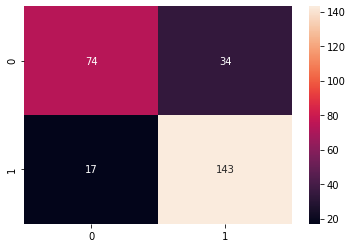

In [92]:
#Confusion matrix 
import seaborn as sns
import tensorflow as tf
sns.heatmap(tf.math.confusion_matrix(y_test,y_predicted),annot=True,fmt='d')

In [93]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74       108
           1       0.81      0.89      0.85       160

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

